# Модель конфликтного взаимодействия

## Описание модели

$$\dot{N_1}(t) = - \alpha_1(t) (a(t) - N_1(t))(b(t) - N_2(t)) + \beta_1(t)N_1(t)N_2(t)$$

$$\dot{N_2}(t) = - \alpha_2(t) (a(t) - N_1(t))(b(t) - N_2(t)) + \beta_2(t)N_1(t)N_2(t)$$

$$N_1(0) = 2 \times 10^4, \, N_2(0) = 8 \times 10^5$$

$$a(t) = 2 \times 10^5$$

$$b(t) = 4 \times 10^6$$

$$\alpha_1(t) = 4 \times 10^{-11} e^{\frac{t}{T}}$$

$$\alpha_2(t) = 10^{-11} e^{\frac{t}{T}}$$

$$\beta_1(t) = 10^{-8} e^{\frac{t}{T}}$$

$$\beta_2(t) = 7.5 \times 10^{-8} e^{\frac{t}{T}}$$



## Реализация модели

Импортируем инструменты

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import exp

from dsolvemethods import CauchyProblem, RungeKutta, VectorFunction

Задаём начальные параметры

In [2]:
N_1 = 8 * 10**4
N_2 = 8 * 10**5
T = 50

Задаём параметры системы

In [3]:
a = 2 * 10**5
b = 4 * 10**6

a_10 = 4 * 10**(-11)
alpha_1 = lambda t: a_10 * exp(t/T)

a_20 = 10**(-11)
alpha_2 = lambda t: a_20 * exp(t/T)

b_10 = 10**(-8)
beta_1 = lambda t: b_10 * exp(t/T)

b_20 = 7.5 * 10**(-8)
beta_2 = lambda t: b_20 * exp(t/T)

Задаём систему уравнений полагая

$$y = (l, r)^T$$

In [4]:
f = VectorFunction(
    [
        lambda t, y: -alpha_1(t)*(a - y[0])*(b - y[1]) + beta_1(t)*y[0]*y[1],
        lambda t, y: -alpha_2(t)*(a - y[0])*(b - y[1]) + beta_2(t)*y[0]*y[1]
    ]
)

Задаём задачу Коши

In [5]:
model = CauchyProblem(f, 0.0, np.array([N_1, N_2]))

Инициализируем солвер и строим траектории  𝑦  для четырёх месяцев.

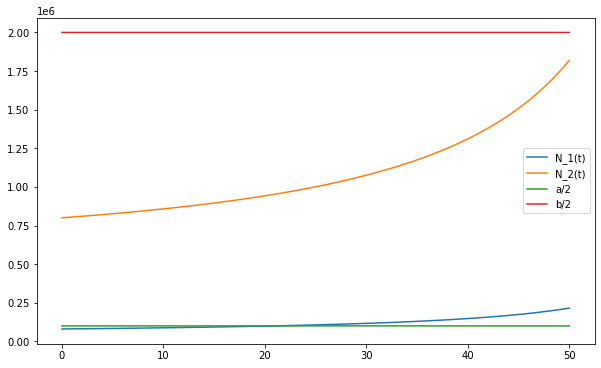

Wall time: 2.7 s


In [6]:
%%time

rk = RungeKutta(h=0.001)
args, values = rk.solve(model, T)

plt.figure(figsize=(10, 6))
plt.plot(args, values[:, 0], label='N_1(t)')
plt.plot(args, values[:, 1], label='N_2(t)')
plt.plot(args, a * np.ones(len(args)) / 2, label='a/2')
plt.plot(args, b * np.ones(len(args)) / 2, label='b/2')
plt.legend()
plt.show()

Посмотрим, к какому результату мы пришли

In [7]:
print(
    "N_0(T) = {:10.4f}".format(values[0, 0]), 
    "N_0(T) = {:10.4f}".format(values[0, 1]),
    "N_1(T) = {:10.4f}".format(values[-1, 0]), 
    "N_1(T) = {:10.4f}".format(values[-1, 1]),
    sep='\n'
)

N_0(T) = 80000.0000
N_0(T) = 800000.0000
N_1(T) = 215091.6157
N_1(T) = 1818575.8751
